In [1]:
import torch
import numpy as np

from data import data_preprocess
from evaluation import metrics
from model import end2end, end2end_crps

In [2]:
x_train, y_train, x_test, y_test = data_preprocess.data_preprocess('mpg')

In [3]:
end2end_model = end2end.train_model(x_train, y_train, calibration_threshold = .03)

initial loss:  930.5950927734375
501 0.03182222222222221 tensor(2.8367, grad_fn=<MeanBackward0>) tensor(0.0422, grad_fn=<SumBackward1>)
502 0.03297777777777778 tensor(2.8339, grad_fn=<MeanBackward0>) tensor(0.0424, grad_fn=<SumBackward1>)
503 0.03013333333333334 tensor(2.8318, grad_fn=<MeanBackward0>) tensor(0.0422, grad_fn=<SumBackward1>)
504 0.032733333333333316 tensor(2.8295, grad_fn=<MeanBackward0>) tensor(0.0425, grad_fn=<SumBackward1>)
506 0.03285555555555554 tensor(2.8247, grad_fn=<MeanBackward0>) tensor(0.0425, grad_fn=<SumBackward1>)
508 0.03335555555555553 tensor(2.8184, grad_fn=<MeanBackward0>) tensor(0.0425, grad_fn=<SumBackward1>)
510 0.03144444444444443 tensor(2.8111, grad_fn=<MeanBackward0>) tensor(0.0424, grad_fn=<SumBackward1>)
512 0.031699999999999985 tensor(2.8030, grad_fn=<MeanBackward0>) tensor(0.0423, grad_fn=<SumBackward1>)
522 0.03183333333333334 tensor(2.7816, grad_fn=<MeanBackward0>) tensor(0.0426, grad_fn=<SumBackward1>)
524 0.0377 tensor(2.7904, grad_fn=<Mea

833 0.044688888888888896 tensor(2.5051, grad_fn=<MeanBackward0>) tensor(0.0435, grad_fn=<SumBackward1>)
834 0.046411111111111084 tensor(2.5121, grad_fn=<MeanBackward0>) tensor(0.0435, grad_fn=<SumBackward1>)
835 0.04536666666666668 tensor(2.5034, grad_fn=<MeanBackward0>) tensor(0.0435, grad_fn=<SumBackward1>)
836 0.04625555555555552 tensor(2.5069, grad_fn=<MeanBackward0>) tensor(0.0434, grad_fn=<SumBackward1>)
837 0.04115555555555558 tensor(2.4981, grad_fn=<MeanBackward0>) tensor(0.0433, grad_fn=<SumBackward1>)
838 0.043655555555555524 tensor(2.5019, grad_fn=<MeanBackward0>) tensor(0.0431, grad_fn=<SumBackward1>)
839 0.03993333333333335 tensor(2.4949, grad_fn=<MeanBackward0>) tensor(0.0431, grad_fn=<SumBackward1>)
840 0.043511111111111084 tensor(2.5004, grad_fn=<MeanBackward0>) tensor(0.0431, grad_fn=<SumBackward1>)
841 0.040566666666666674 tensor(2.4940, grad_fn=<MeanBackward0>) tensor(0.0432, grad_fn=<SumBackward1>)
842 0.04369999999999997 tensor(2.5011, grad_fn=<MeanBackward0>) tens

991 0.05618888888888891 tensor(2.3782, grad_fn=<MeanBackward0>) tensor(0.0445, grad_fn=<SumBackward1>)
992 0.05127777777777777 tensor(2.3871, grad_fn=<MeanBackward0>) tensor(0.0441, grad_fn=<SumBackward1>)
993 0.05451111111111115 tensor(2.3768, grad_fn=<MeanBackward0>) tensor(0.0445, grad_fn=<SumBackward1>)
994 0.05199999999999998 tensor(2.3849, grad_fn=<MeanBackward0>) tensor(0.0441, grad_fn=<SumBackward1>)
995 0.053022222222222255 tensor(2.3720, grad_fn=<MeanBackward0>) tensor(0.0443, grad_fn=<SumBackward1>)
996 0.04739999999999997 tensor(2.3787, grad_fn=<MeanBackward0>) tensor(0.0439, grad_fn=<SumBackward1>)
997 0.050111111111111155 tensor(2.3685, grad_fn=<MeanBackward0>) tensor(0.0442, grad_fn=<SumBackward1>)
998 0.04733333333333331 tensor(2.3790, grad_fn=<MeanBackward0>) tensor(0.0440, grad_fn=<SumBackward1>)
999 0.05494444444444447 tensor(2.3716, grad_fn=<MeanBackward0>) tensor(0.0445, grad_fn=<SumBackward1>)
final loss:  2.3715555667877197


End2end test MAPE:  0.07896426


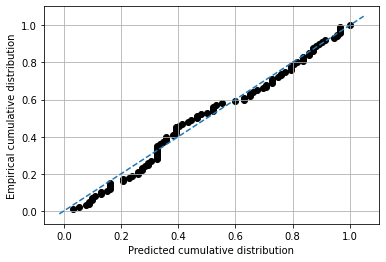

End2end test calibration error when step size is 0.001:  0.9962769376181475
End2end test calibration error when step size is 0.01:  0.10073724007561437
End2end test calibration error when step size is 0.1:  0.010113421550094513


In [4]:
mean_pred, var_pred = end2end_model(x_test)
mean_pred = mean_pred.detach().numpy()
var_pred = var_pred.detach().numpy()

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

In [3]:
end2end_model = end2end_crps.train_model(x_train, y_train, calibration_threshold = .03)

initial loss:  798.154052734375
640 0.0303333333333333 tensor(2.6999, grad_fn=<MeanBackward0>) tensor(1.3889, grad_fn=<MeanBackward0>)
641 0.05740000000000003 tensor(2.7633, grad_fn=<MeanBackward0>) tensor(1.4130, grad_fn=<MeanBackward0>)
642 0.1402333333333333 tensor(2.9255, grad_fn=<MeanBackward0>) tensor(1.4787, grad_fn=<MeanBackward0>)
643 0.18266666666666673 tensor(2.9407, grad_fn=<MeanBackward0>) tensor(1.4975, grad_fn=<MeanBackward0>)
644 0.18411111111111106 tensor(2.9200, grad_fn=<MeanBackward0>) tensor(1.5003, grad_fn=<MeanBackward0>)
645 0.11681111111111118 tensor(2.7757, grad_fn=<MeanBackward0>) tensor(1.4394, grad_fn=<MeanBackward0>)
646 0.06986666666666666 tensor(2.7279, grad_fn=<MeanBackward0>) tensor(1.4037, grad_fn=<MeanBackward0>)
647 0.04331111111111112 tensor(2.6942, grad_fn=<MeanBackward0>) tensor(1.3887, grad_fn=<MeanBackward0>)
648 0.033200000000000014 tensor(2.6787, grad_fn=<MeanBackward0>) tensor(1.3769, grad_fn=<MeanBackward0>)
678 0.03248888888888887 tensor(2.

End2end test MAPE:  0.08159242
End2end test RMSE:  2.5821118


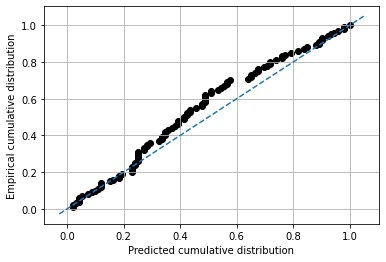

End2end test calibration error when step size is 0.001:  4.1394763705103985
End2end test calibration error when step size is 0.01:  0.41972117202268455
End2end test calibration error when step size is 0.1:  0.04813327032136109


In [4]:
mean_pred, var_pred = end2end_model(x_test)
mean_pred = mean_pred.detach().numpy()
var_pred = var_pred.detach().numpy()

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))